# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

titanic = pd.read_csv("./train.csv")

## 1. 분석의 목적과 변수 확인

In [3]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## 2. 데이터 전체적으로 살펴보기

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.corr()
# Correlation is not Causation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
#결측치 확인
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

In [8]:
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

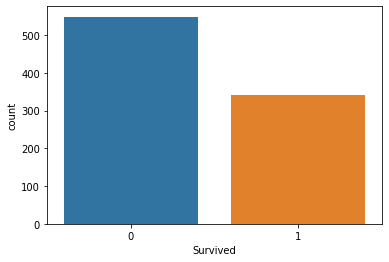

In [9]:
sns.countplot(x="Survived", data = titanic)
plt.show()

In [10]:
titanic[["Pclass", "Survived"]].groupby(["Pclass"]).sum()

,Survived
Pclass,
1,136
2,87
3,119


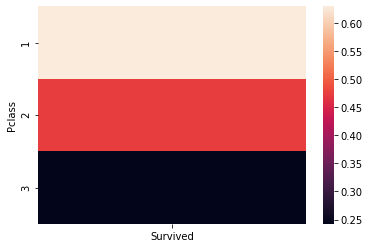

In [11]:
sns.heatmap(titanic[["Pclass", "Survived"]].groupby(["Pclass"]).mean())
plt.show()

In [12]:
titanic.groupby(["Survived", "Sex"])["Survived"].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

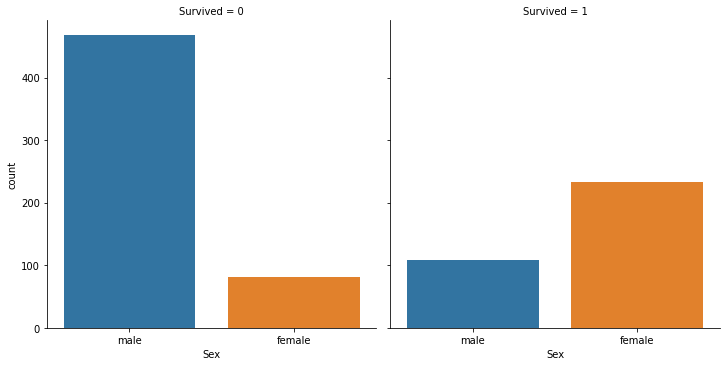

In [13]:
sns.catplot(x = "Sex",col="Survived", kind = "count", data = titanic)

In [14]:
titanic.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

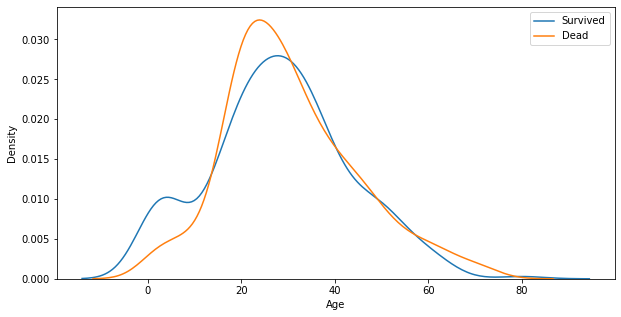

In [18]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.kdeplot(x=titanic[titanic.Survived == 1]['Age'], ax=ax)
sns.kdeplot(x=titanic[titanic.Survived == 0]['Age'], ax=ax)
plt.legend(['Survived', "Dead"])
plt.show()

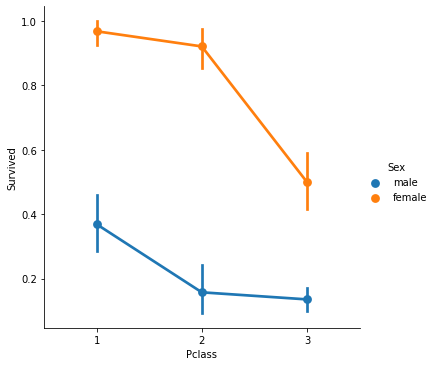

In [20]:
sns.catplot(x='Pclass', y="Survived", hue = 'Sex', kind='point', data = titanic)
plt.show()

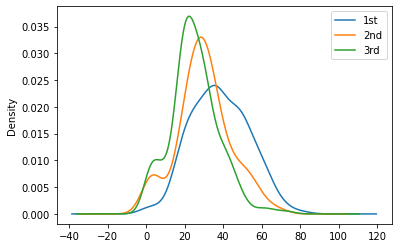

In [24]:
titanic['Age'][titanic.Pclass == 1].plot(kind="kde")
titanic['Age'][titanic.Pclass == 2].plot(kind="kde")
titanic['Age'][titanic.Pclass == 3].plot(kind="kde")
plt.legend(['1st','2nd','3rd'])
plt.show()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

# 1 타이타닉

In [3]:
titanic.groupby("Embarked")["Survived"].value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

## 항구별로 사망한 비율이 차이가 있음

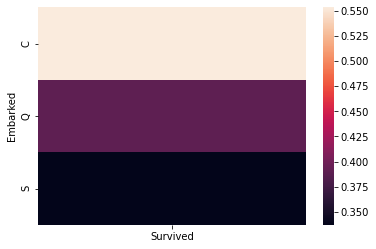

In [4]:
sns.heatmap(titanic[["Embarked", "Survived"]].groupby(["Embarked"]).mean())
plt.show()

### 첫번째 추론 : S가 다른 항구 탑승객에 비해서 Pclass가 낮나?

In [5]:
titanic.groupby("Embarked")["Pclass"].value_counts()

Embarked  Pclass
C         1          85
          3          66
          2          17
Q         3          72
          2           3
          1           2
S         3         353
          2         164
          1         127
Name: Pclass, dtype: int64

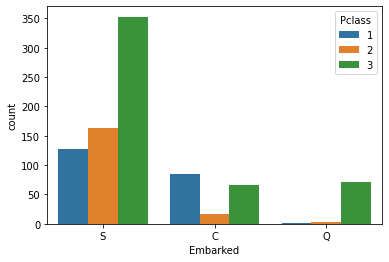

In [6]:
sns.countplot(x="Embarked" ,hue="Pclass", data = titanic)
plt.show()

### 오히려 3등급의 탑승객 비율은 Queenstown이 제일 높았음

### 두번째 추론 : 남녀 비율이 다른가?

In [7]:
titanic.groupby("Embarked")["Sex"].value_counts()

Embarked  Sex   
C         male       95
          female     73
Q         male       41
          female     36
S         male      441
          female    203
Name: Sex, dtype: int64

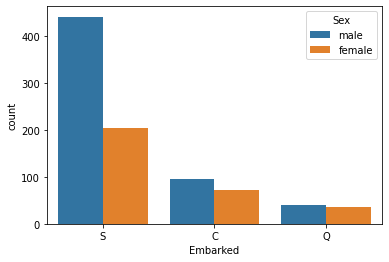

In [8]:
sns.countplot(x="Embarked" ,hue="Sex", data = titanic)
plt.show()

## S가 남자의 비율이 월등히 높은것을 알 수 있었다

## 3번째 추론 : S는 배가 맨 처음 출발한 항구 -> 승무원의 비율이 높을것이다

In [39]:
titanic[titanic.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


## 실제로 Fare가 0인 사람들은 모두 S에서 배를 탄 남성

32.204207968574636


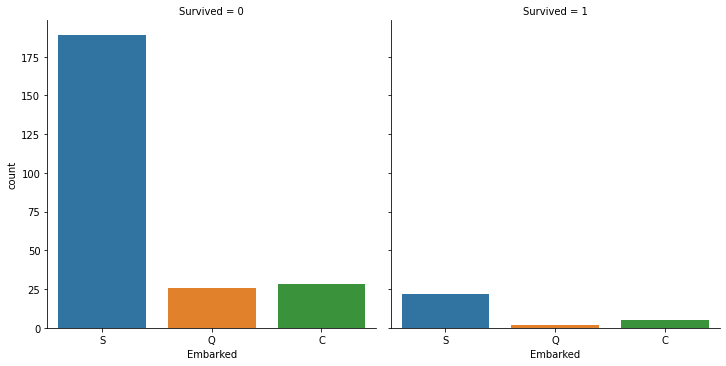

In [49]:
print(titanic.Fare.mean())
sns.catplot(x = "Embarked", data = titanic[(titanic.Fare < 10) & (titanic.Sex == 'male')], col = "Survived", kind="count")
plt.show()

## 결론
### S에서는 다수의 승무원이 승선을 하여서 다른 항구대비 생존률이 낮았다고 추정됨

# 2 데이터셋 EDA

In [2]:
edu = pd.read_csv('./StudentsPerformance.csv')

## 대략적인 개요
* gender : 성별
* race/ethnicity : 인종에 따른 그룹
* parental level of education : 부모의 학력수준
* lunch : 점심에 따른 수준(부모의 소득수준)
* test preparation course : test preparation course의 수강여부
* math score : 수학점수
* reading score : 읽기점수
* writing score : 쓰기점수

In [3]:
edu.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
edu.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
edu["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

### 결측치 없음

In [6]:
edu.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## 데이터 전처리
* 상관관계를 한눈에 보기위해 일부 데이터를 수치화시킴 

In [7]:
def gender(row):
    if row == "female":
        return 0
    elif row == "male":
        return 1
def lunch(row):
    if row == "standard":
        return 0
    elif row == "free/reduced":
        return 1
def test(row):
    if row == "completed":
        return 0
    elif row == "none":
        return 1

In [8]:
edu["gender"] = edu["gender"].apply(gender)
edu["lunch"] = edu["lunch"].apply(lunch)
edu["test preparation course"] = edu["test preparation course"].apply(test)

## 상관관계를 통해 알 수 있는 Feature
* 스코어별 양의 상관관계를 가지고 있다 - 하나의 점수가 높으면 다른점수도 자연스럽게 높음
* lunch와 test preparation course의 종류에 따라서 점수의 차이가 존재함
* 평균적으로 남성은 math, 여성은 reading, writing의 점수가 다른 성별보다 높음

In [9]:
edu.corr()

,gender,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,-0.021372,-0.006028,0.167982,-0.244313,-0.301225
lunch,-0.021372,1.000000,-0.017044,-0.350877,-0.229560,-0.245769
test preparation course,-0.006028,-0.017044,1.000000,-0.177702,-0.241780,-0.312946
math score,0.167982,-0.350877,-0.177702,1.000000,0.817580,0.802642
reading score,-0.244313,-0.229560,-0.241780,0.817580,1.000000,0.954598
writing score,-0.301225,-0.245769,-0.312946,0.802642,0.954598,1.000000


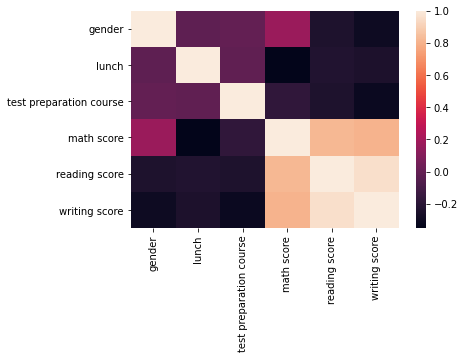

In [10]:
sns.heatmap(data = edu.corr())
plt.show()

## 남여의 시험 성적 평균

In [23]:
edu.pivot_table(["math score", "reading score" ,"writing score"], index = "gender")

,math score,reading score,writing score
gender,,,
0,63.633205,72.608108,72.467181
1,68.728216,65.473029,63.311203


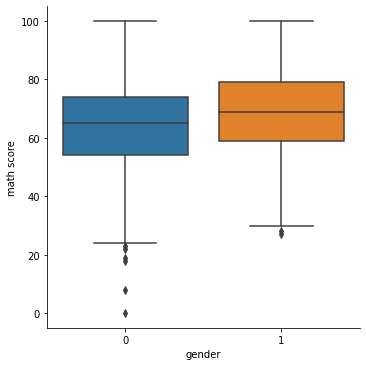

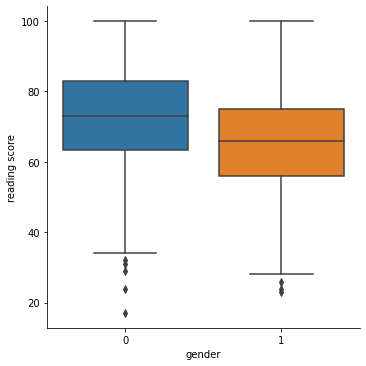

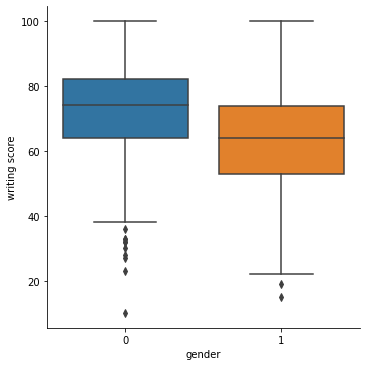

In [12]:
sns.catplot(data = edu, y = "math score",x = "gender", kind = "box")
sns.catplot(data = edu, y = "reading score",x = "gender", kind = "box")
sns.catplot(data = edu, y = "writing score",x = "gender", kind = "box")
plt.show()
#이부분을 하나의 그래프로 만들고 싶은데 혹시 가능한 함수가 있나요?

## lunch, test preparation course에 따른 시험성적 추이

In [24]:
edu.pivot_table(["math score", "reading score" ,"writing score"], index = "lunch")

,math score,reading score,writing score
lunch,,,
0,70.034109,71.654264,70.823256
1,58.921127,64.653521,63.022535


In [26]:
edu.pivot_table(["math score", "reading score" ,"writing score"], index = "test preparation course")

,math score,reading score,writing score
test preparation course,,,
0,69.695531,73.893855,74.418994
1,64.077882,66.534268,64.504673


## 그 외의 지표를 통한 추정

### 1. 부모의 학력이 높으면 lunch를 통한 소득량도 높을것이다.

In [23]:
edu.groupby("parental level of education")["lunch"].value_counts()

parental level of education  lunch
associate's degree           0        145
                             1         77
bachelor's degree            0         74
                             1         44
high school                  0        126
                             1         70
master's degree              0         35
                             1         24
some college                 0        147
                             1         79
some high school             0        118
                             1         61
Name: lunch, dtype: int64

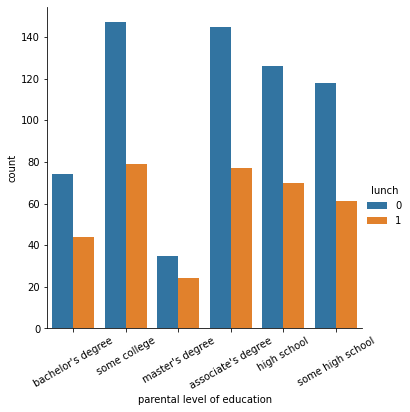

In [32]:
sns.catplot(data = edu, hue = "lunch", x = "parental level of education", kind = "count").set_xticklabels(rotation=30)
plt.show()

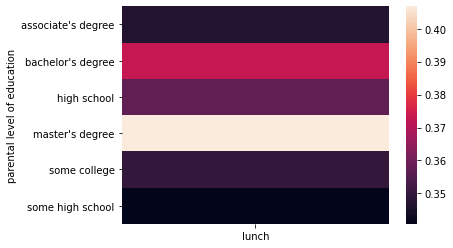

In [28]:
sns.heatmap(edu[["parental level of education", "lunch"]].groupby(["parental level of education"]).mean())
plt.show()

### 오히려 가장 학력수준이 높은 master's degree가 소득비율이 낮았음

### 2. 부모의 학력수준이 높으면 아이의 성적도 높을것이다.

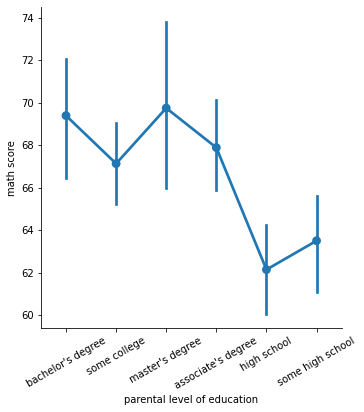

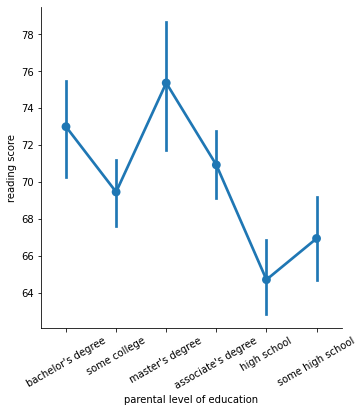

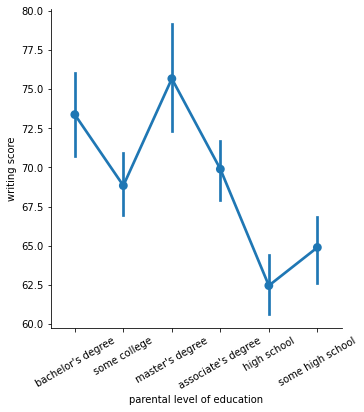

In [45]:
sns.catplot(x='parental level of education', y="math score", kind='point', data = edu).set_xticklabels(rotation=30)
sns.catplot(x='parental level of education', y="reading score", kind='point', data = edu).set_xticklabels(rotation=30)
sns.catplot(x='parental level of education', y="writing score", kind='point', data = edu).set_xticklabels(rotation=30)
plt.show()
#이것도 합치면 좋을거같은데......

### 상대적으로 저학력인 high school 그룹의 모든 성적이 다른 그룹에 비해 낮은 평균성적을 가지고 있음

### 3. 그룹별 Feature

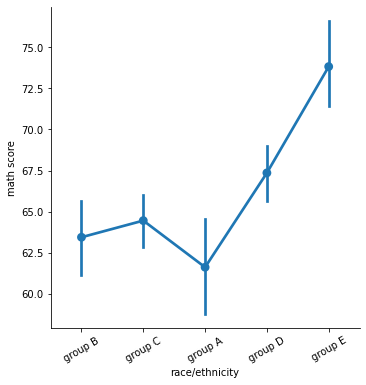

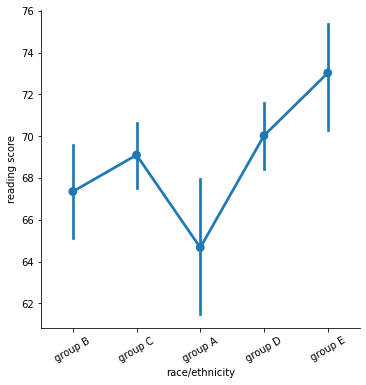

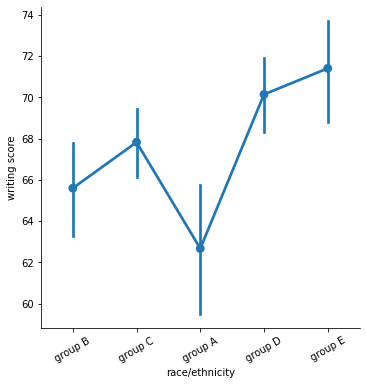

In [50]:
sns.catplot(x='race/ethnicity', y="math score", kind='point', data = edu).set_xticklabels(rotation=30)
sns.catplot(x='race/ethnicity', y="reading score", kind='point', data = edu).set_xticklabels(rotation=30)
sns.catplot(x='race/ethnicity', y="writing score", kind='point', data = edu).set_xticklabels(rotation=30)
plt.show()

### 그룹 A < B < C < D < E 로 평균 성적이 높은것을 확인할 수 있었다.